In [22]:
import sys
sys.path.append("D:\python\lib\site-packages")
import os
import logging
import pyxdf as xdf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
xdf.load_xdf("test3.xdf")

([{'info': defaultdict(list,
               {'name': ['UnityData Stram'],
                'type': ['LSL_Marker_Strings'],
                'channel_count': ['1'],
                'nominal_srate': ['0'],
                'channel_format': ['string'],
                'source_id': ['D3F83BB699EB49AB94A9FA44B88882AB'],
                'version': ['1.1000000000000001'],
                'created_at': ['30310.793666599999'],
                'uid': ['e7f7893c-3139-4a03-9a7a-36f605b84aaa'],
                'session_id': ['default'],
                'hostname': ['LAPTOP-JQKQ10DS'],
                'v4address': [None],
                'v4data_port': ['16574'],
                'v4service_port': ['16574'],
                'v6address': [None],
                'v6data_port': ['16574'],
                'v6service_port': ['16574'],
                'desc': [None],
                'effective_srate': 0}),
   'footer': {'info': defaultdict(list,
                {'first_timestamp': ['50.07993316650391'],
    

In [16]:
streams = xdf.load_xdf("test3.xdf")
for i in range(len(streams[0])):
    print(streams[0][i]['info']['name'][0])

UnityData Stram
openvibeMarkers
openvibeSignal


In [69]:
# We use
streams = []
def exportStream(file_path, stream_name, markers_stream_name=None, subject_number=None, markers_to_write=None):
    """
    file_path -- path to the XDF file
    stream_name -- name of the stream (in the XDF file) that is going to be exported
    markers_stream_none -- name of the stream of markers, if any (optional)
    subject_number -- number of the subject, used only name the generated CSV file
    markers_to_write -- list of markers to be exported if only some are desired (if empty, all markers in markers_stream name will be exported)
    """
    streams = xdf.load_xdf(file_path)
    
    # Find the desired stream
    desired_stream = None
    for i in range (len(streams[0])):
        if streams[0][i]['info']['name'][0] == stream_name:
            desired_stream = streams[0][i]
            break
    
    if desired_stream is None:
        return "Stream " + stream_name + " not found"

    if markers_stream_name is not None and markers_stream_name is not '':
        # Put the data in array, row by row, with a place for the markers
        desired_stream_data = []
        for i in range(len(desired_stream['time_series'])):
            #desired_stream_data.append([desired_stream['time_series'][i][0], 0, desired_stream['time_stamps'][i]])
            desired_stream_data.append([desired_stream["time_series"][i][0],

                                       desired_stream["time_series"][i][1], desired_stream["time_series"][i][2],

                                       desired_stream["time_series"][i][3], desired_stream["time_series"][i][4],

                                       desired_stream["time_series"][i][5], desired_stream["time_series"][i][6],

                                       desired_stream["time_series"][i][7], desired_stream["time_series"][i][8],

                                       desired_stream["time_series"][i][9], desired_stream["time_series"][i][10],

                                      desired_stream["time_series"][i][11], desired_stream["time_series"][i][12],

                                      desired_stream["time_series"][i][13], 0, desired_stream['time_stamps'][i]])
        # Find the Marker data
        markers = None
        for i in range (len(streams[0])):
            if streams[0][i]['info']['name'][0] == markers_stream_name:
                markers = streams[0][i]
                break
        
        if markers is None:
            return "Markers stream " + markers_stream_name + " not found"

        # Define function for finding the nearest value in an array
        # Used to find the closest desired stream timestamp that matches the timestamp of each marker
        def find_nearest(array,value):
            idx = (np.abs(array-value)).argmin()
            return idx

        # Add the markers to right rows of desired stream data
        for i in range(len(markers['time_series'])):
            if markers_to_write == None or len(markers_to_write) == 0 or int(markers['time_series'][i]) in markers_to_write:
                index = find_nearest(desired_stream['time_stamps'], markers['time_stamps'][i])
                #print(markers['time_series'][i])
                desired_stream_data[index][14] = markers['time_series'][i]

        # Create a dataframe with the desired stream data
        #print(desired_stream_data)
        desired_stream_dataframe = pd.DataFrame(desired_stream_data, columns=["CH1", "CH2","CH3","CH4","CH5","CH6","CH7","CH8","CH9","CH10","CH11","CH12", "CH13","CH14", 'Markers', 'Time'])
    else:
        # Put the data in array, row by row
        desired_stream_data = []
        for i in range(len(desired_stream['time_series'])):
            #desired_stream_data.append([desired_stream['time_series'][i][0], desired_stream['time_stamps'][i]])
            desired_stream_data.append([desired_stream["time_series"][i][0],

                                       desired_stream["time_series"][i][1], desired_stream["time_series"][i][2],

                                       desired_stream["time_series"][i][3], desired_stream["time_series"][i][4],

                                       desired_stream["time_series"][i][5], desired_stream["time_series"][i][6],

                                       desired_stream["time_series"][i][7], desired_stream["time_series"][i][8],

                                       desired_stream["time_series"][i][9], desired_stream["time_series"][i][10],

                                      desired_stream["time_series"][i][11], desired_stream["time_series"][i][12],

                                      desired_stream["time_series"][i][13], 0, desired_stream['time_stamps'][i]])
        
        # Create a dataframe with the desired stream data
        desired_stream_dataframe = pd.DataFrame(desired_stream_data, columns=[stream_name, 'Time'])
    # Save the desired stream dataframe to CSV
    desired_stream_dataframe.to_csv("untitled-test.csv", sep=';', index=False)
    print("File created successfully")

In [71]:
exportStream("test3.xdf", "openvibeSignal", "UnityData Stram")

File created successfully


(70, 71)

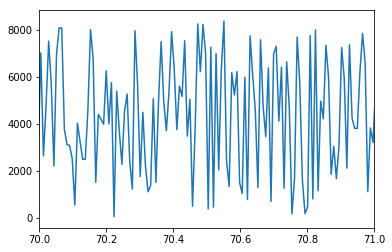

In [66]:
datacsv = pd.read_csv('untitled-test.csv', sep=';')
plt.plot(datacsv['Time'], datacsv['openvibeSignal'])
plt.xlim([70, 71]) #Focus on a smaller epoch
#print(datacsv['Time'])
#datacsv

In [ ]:
import numpy as np
import mne

# Read the CSV file as a NumPy array
data = np.loadtxt('untitled-test.csv', delimiter=';')

# Some information about the channels
ch_names = ['time','CH 1','CH 2', 'CH 3', 'CH 4', 'CH 5', 'CH 6', 'CH 7', 'CH 8', 'CH 9', 'CH 10', 'CH 11', 'CH 12', 'CH 13', 'CH 14']

# Sampling rate of the Nautilus machine
sfreq = 128  # Hz

# Create the info structure needed by MNE
info = mne.create_info(ch_names, sfreq)

# Finally, create the Raw object
raw = mne.io.RawArray(data.T, info)

In [ ]:
raw.plot()